# Project 1 - Classification
## CS (STAT) 5525 Due - April 1, 2021
## Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of classification algorithms on several synthetic and real-world data sets. This will be done in the following steps:
- First, you will explore the data sets.
- Next, you will perform a series of experiments on which you will be asked to answer
a series of questions. For these experiments, you will be running a Python Jupyter notebook.
- Third, you will compile your answers in the form of a report.

## Python Jupyter Notebooks
We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:
- Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
- Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handling-issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
- Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/,
https://www.youtube.com/watch?v=3C9E2yPBw7s
1

## Before you Begin
- Visually explore the data sets in the experiments below, and consider the following:
    - Types of attributes 
    - Class distribution
    - Which attributes appear to be good predictors, if any
    - Possible correlation between attributes
    - Any special structure that you might observe - Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow
- Use precision and recall as evaluation metrics to report classification performance.
- Your goal is to learn everything that you can about the dataset. Answer the questions
below as a starting point, but you should dig further. What more can you discover? The goal of this assignment is to give a helping hand for you to discover the most interesting and surprising things.
Report and Submission
- Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
- Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

## 1 Problem 1 [37 points]
The files for this problem are under the Experiment 1 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to use as a starting point: Exploratory data analysis.ipynb. In this experiment, we will do exploratory data analysis to get a better sense of data. The dataset contains record of telecom customer along with the label "churn". Churn = "true" signifies that the customer has left the company and churn = "false" signifies that the customer is still loyal to the company. Answer the following questions

In [1]:
import pandas as pd
import dplyr as dp

ModuleNotFoundError: No module named 'dplyr'

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. How many records are there in the dataset?

In [185]:
len(df)

3333

In [186]:
df.shape[0]

3333

`There are 3333 records in the dataset`

2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [187]:
df.shape[1]

21

In [188]:
len(df.columns)

21

In [189]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [190]:
pd.set_option('display.max_rows', 65)
print (df.dtypes)


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


`State, area code, phone number, international plan, voice mail paln, and churn are categorical. Account length, number vmail messages, total day calls, total eve calls, total night calls, total intl calls, and customer service calls are counts. Total day minutes, total day charge, total eve minutes, total eve charge, total night minutes, total night charge, total intl minutes, and total intl charge are continuous`

3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [23]:
unique_states = df["state"].unique()
unique_states.sort()
unique_states

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [196]:
df[["total day minutes","total day charge", "total eve minutes", "total eve charge", "total night minutes", "total night charge", "total intl minutes", "total intl charge"]].describe(include="all")

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,2.764581
std,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,0.753773
min,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000
25%,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,2.300000
50%,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,2.780000
75%,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,3.270000
max,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,5.400000


`average, median, maximum, minimum, and standard deviation of continuous features displayed above`

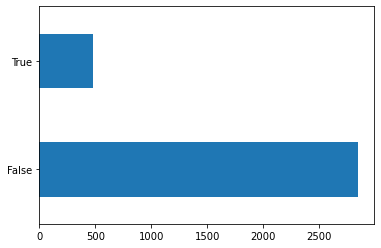

In [25]:
df["churn"].value_counts().plot.barh();

4. What is the average number of customer service calls made by a customer to the company?

In [198]:
df[["customer service calls"]].describe(include="all")

,customer service calls
count,3333.000000
mean,1.562856
std,1.315491
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


`The average number of customer service calls is 1.56`

5. What is the distribution of the class variable, "churn"? Calculate the probability of P(churn = True) and P(churn = False).

In [36]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [200]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

`P(churn = True) = 0.14; P(churn = False) = 0.86`

6. What is the distribution of the feature, "international plan"? Calculate the probability of P(international plan = 'yes') and P(international plan = 'no').

In [37]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [201]:
df['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

`P(international plan = yes) = 0.1; P(international plan = no) = 0.9`

7. Assume you have devised a classification model that states that if "international plan" = 'no', then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

In [39]:
# churn and international plan
df[(df['international plan'] == 'no')& (df['churn'] == False)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [202]:
# and comnpare to total counts of no
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [205]:
(2664/3010)*100

88.50498338870432

`Accuracy is 88.5%`

8. Calculate the following conditional probabilities:

In [41]:
pd.crosstab(df['churn'], df['international plan'], normalize="columns")

international plan,no,yes
churn,,
False,0.88505,0.575851
True,0.11495,0.424149


- P(churn = True | international plan = 'yes')

In [209]:
churn_true_inter_yes = pd.crosstab(
    df['churn'],
    df['international plan'],
    normalize="columns",
).iloc[1, 1]
churn_true_inter_yes

0.4241486068111455

`P(churn = True | international plan = 'yes') = 0.42`

- P(churn = False | international plan = 'yes')

In [211]:
churn_false_inter_yes = pd.crosstab(
    df['churn'],
    df['international plan'],
    normalize="columns",
).iloc[0, 1]
churn_false_inter_yes

0.5758513931888545

`P(churn = False | international plan = 'yes') = 0.58`

- P(churn= True | international plan = 'no')

In [212]:
churn_true_inter_no = pd.crosstab(
    df['churn'],
    df['international plan'],
    normalize="columns",
).iloc[1, 0]
churn_true_inter_no

0.11495016611295682

`P(churn= True | international plan = 'no') = 0.11`

- P(churn = False | international plan = 'no')

In [213]:
churn_false_inter_no = pd.crosstab(
    df['churn'],
    df['international plan'],
    normalize="columns",
).iloc[0, 0]
churn_false_inter_no

0.8850498338870432

`P(churn = False | international plan = 'no') = 0.89`

Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: "Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?"

- P(international plan = 'yes')

In [214]:
inter_yes = df["international plan"].value_counts(normalize=True)[1]
inter_yes

0.0969096909690969

`P(international plan = 'yes') = 0.097`

- P(international plan = 'no')

In [215]:
inter_no = df["international plan"].value_counts(normalize=True)[0]
inter_no

0.903090309030903

`P(international plan = 'no') = 0.90`

- P(churn=True)

In [216]:
churn_true = df["churn"].value_counts(normalize=True)[1]
churn_true

0.14491449144914492

`P(churn=True) = 0.14`

- P(churn=False)

In [217]:
churn_false = df["churn"].value_counts(normalize=True)[0]
churn_false

0.8550855085508551

`P(churn=False) = 0.86`

$P(A\mid B)={\frac {P(B\mid A)P(A)}{P(B)}}$

$P(inter=yes|churn=True) = \frac{P(churn=True|inter=yes)P(inter=yes)}{P(churn=True)}$

In [218]:
inter_yes_churn_true = churn_true_inter_yes * inter_yes / churn_true
inter_yes_churn_true

0.2836438923395445

$P(inter=yes|churn=True) = \frac{P(churn=True|inter=yes)P(inter=yes)}{P(churn=True)}$ = 0.28

$P(inter=no|churn=True) = \frac{P(churn=True|inter=no)P(inter=no)}{P(churn=True)}$

In [219]:
inter_no_churn_true = churn_true_inter_no * inter_no / churn_true
inter_no_churn_true

0.7163561076604554

$P(inter=no|churn=True) = \frac{P(churn=True|inter=no)P(inter=no)}{P(churn=True)}$ = 0.72

$P(inter=yes|churn=False) = \frac{P(churn=False|inter=yes)P(inter=yes)}{P(churn=False)}$

In [220]:
inter_yes_churn_false = churn_false_inter_yes * inter_yes / churn_false
inter_yes_churn_false

0.06526315789473684

$P(inter=yes|churn=False) = \frac{P(churn=False|inter=yes)P(inter=yes)}{P(churn=False)}$ = 0.065

$P(inter=no|churn=False) = \frac{P(churn=False|inter=no)P(inter=no)}{P(churn=False)}$

In [222]:
inter_no_churn_false = churn_false_inter_no * inter_no / churn_false
inter_no_churn_false

0.9347368421052631

$P(inter=no|churn=False) = \frac{P(churn=False|inter=no)P(inter=no)}{P(churn=False)}$ = 0.93

9. Assume you have devised a classification model which states that if "international plan" = "yes" and the number of calls to the service center is greater than 3, then the customer will churn (i.e., "churn" = True). Report the accuracy of this classification model on the given dataset.

In [3]:
df['churn'][df.loc[df['csc']>3].index] = True
df[(df.churn==True) & (df.international_plan=='yes')].shape[0] / df[(df.international_plan=='yes')].shape[0]

KeyError: 'csc'

## 2 Problem 2 [23 points]
The files for this problem are under the Experiment 2 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point: Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation. To visualize decision tree we need additional packages to be installed i.e., Graphviz and pydotplus (check the Anaconda.org page for instructions on how to install them using conda). Answer the following questions:
1. Consider training decision trees for the synthetic dataset involving two classes. How does the decision boundary look like when we overfit ( max depth  4 ) and underfit (max depth = 1) the decision tree on the given data? For both cases, paste the decision tree and the decision boundary from Jupyter notebook output.

In [224]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [225]:
import pandas as pd
df = pd.read_csv('telecom_churn.csv')

# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

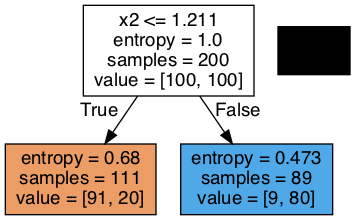

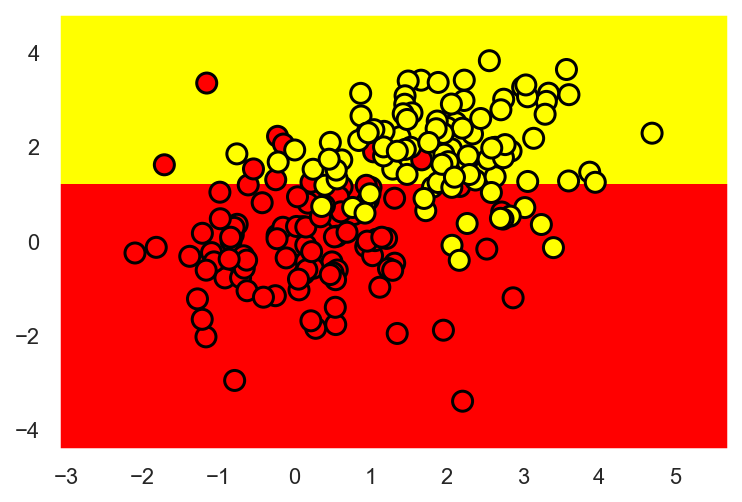

In [19]:
# max depth 1

from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save): 
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))### max depth 1
#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 1, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree1.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree1.png"
Image(filename = PATH , width=900, height=600)

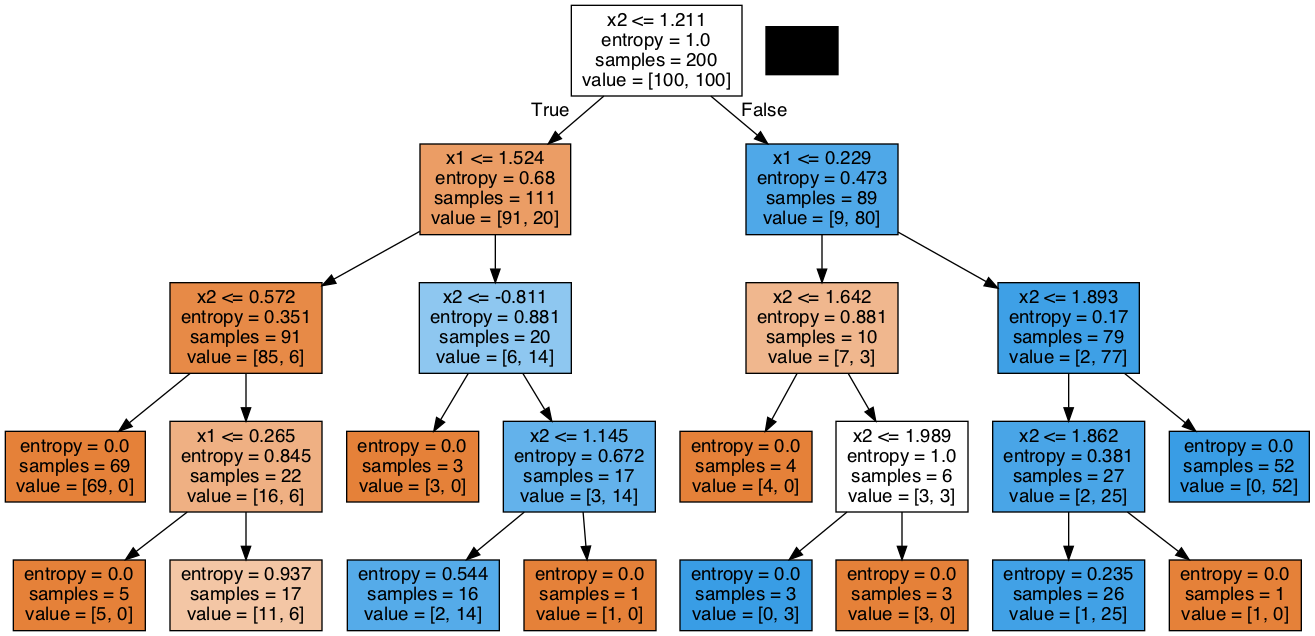

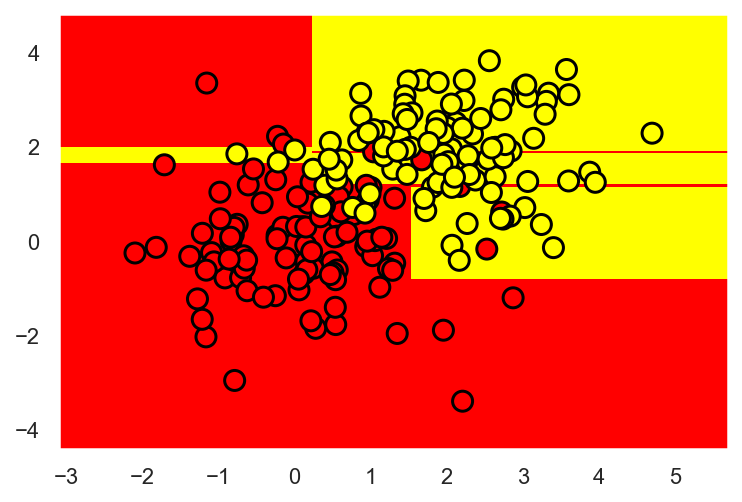

In [226]:
# max depth 4

from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save): 
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))### max depth 1
#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 4, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree1.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree1.png"
Image(filename = PATH , width=900, height=600)

`When we underfit, the decision boundary does not seem to optimally classify the data. When we overfit, the decision boundary seems complicated when classifying the data.`

2. Decision tree classifier sklearn.tree.DecisionT reeClassif ier has parameter "max depth" which defines the maximum depth of the tree. What happens if we don't specify any value for this parameter? Paste the decision tree and the decision boundary you will obtain for this default case from Jupyter notebook output.

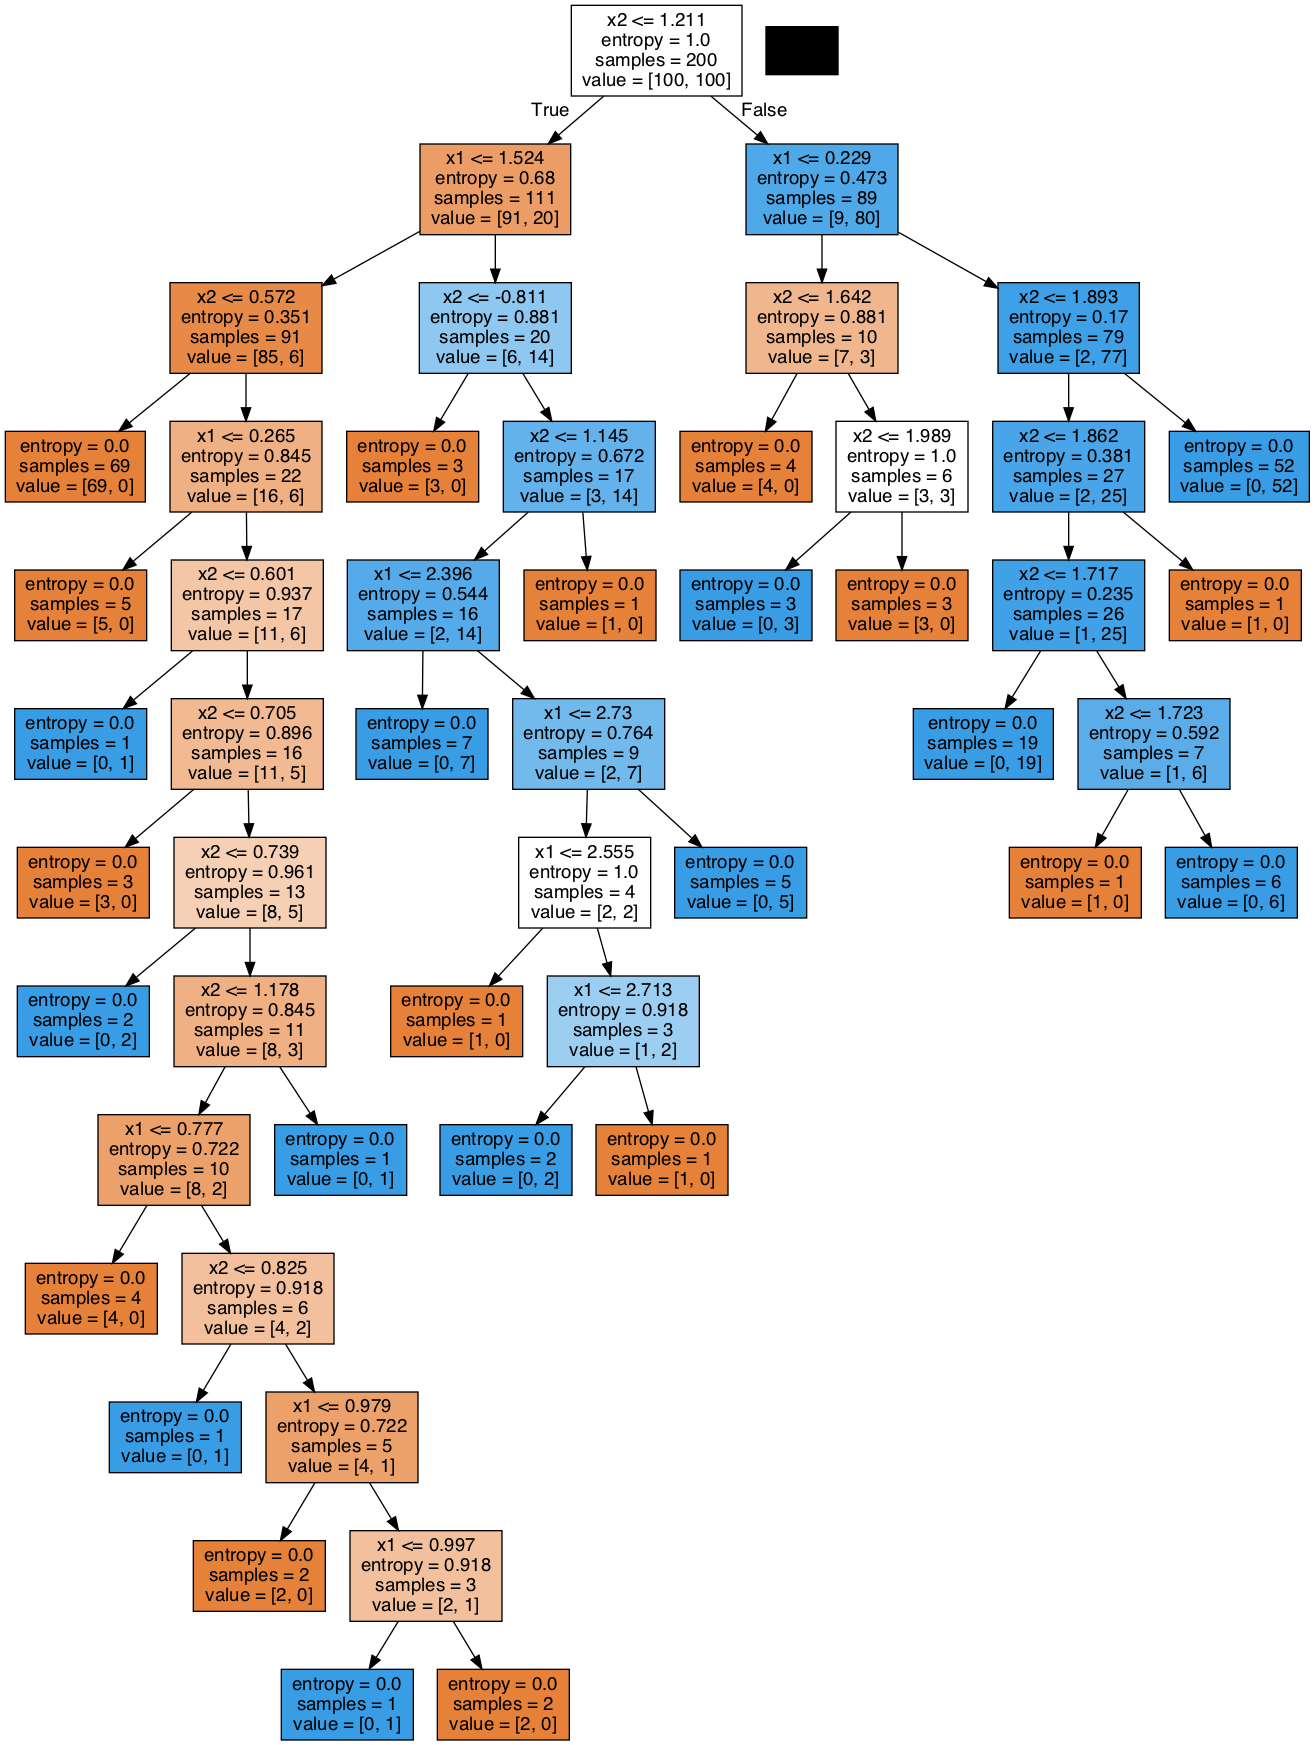

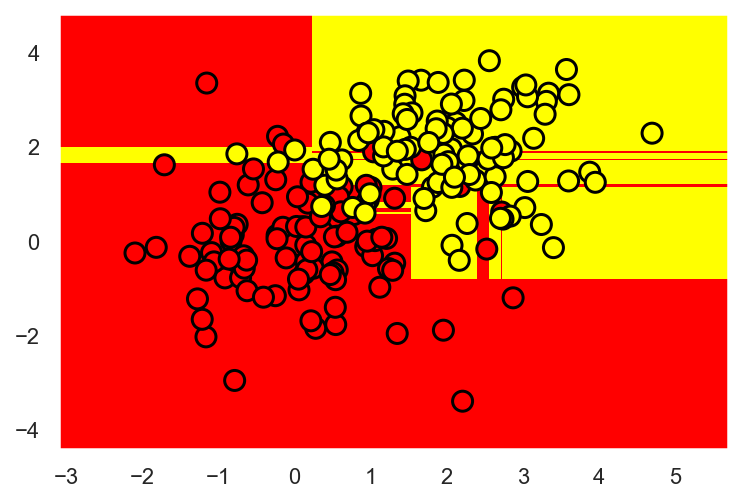

In [227]:
# max depth no value

from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save): 
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))### max depth 1
#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree1.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree1.png"
Image(filename = PATH , width=900, height=600)

`When we don't specify any value for maximum depth, the decision tree seems to become very complicated and overfit the data`

3. For Bank Dataset, what are the 5 different age values that the decision tree used to construct the splits of the tree? What is the significance of these 5 values?

In [230]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})

In [231]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


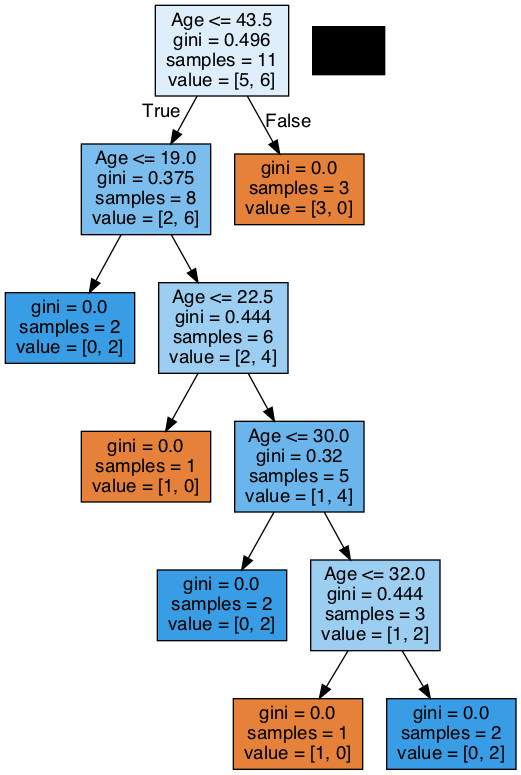

In [232]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='topic3_decision_tree2.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree2.png"
Image(filename = PATH , width=500, height=200)

`The 5 different age values that the decision tree used are 43.5, 19, 22.5, 30, and 32. These are ages at which loan default data patterns are observed by the decision tree`

4. For the customer churn prediction task, we show that the accuracy of the decision tree is 94% when max depth is set to 5. What happens to accuracy when we leave the value of max depth to its default value? Explain the rise/fall of accuracy.

In [233]:
import pandas as pd
df = pd.read_csv('telecom_churn.csv')


df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn','phone number'], axis=1, inplace=True)


In [234]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [32]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

 Accuracy for decision tree is 0.92


In [235]:

knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for k-nn is 0.892


`When we leave the value of max depth to its default value, accuracy decreases to 92%. Tree depth determines how flexible the model is. A
deeper tree can fit more complicated functions. Therefore, increasing tree depth should increase performance on the training set increasing accuracy.`

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler sklearn.preprocessing.StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1, 1]], write down its scaler transformation.

In [236]:
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

`Scaler transformation = d = [[-1, -1], [-1, -1], [1,1,],[1,1]]. Standardize features by removing the mean and scaling to unit variance.`

6. How many decision trees do we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation with the above scenario, how many decision trees do we construct in total?

In [273]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,10),
               'max_features': range(4,18)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(4, 18)},
             verbose=True)

`Fitting 10 folds for each of 126 candidates, totalling 1260 fits`

7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario?

In [275]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 6, 'max_features': 16}, 0.9447048897692675)

`The best choice of k[1-10] is 6`

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

In [263]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

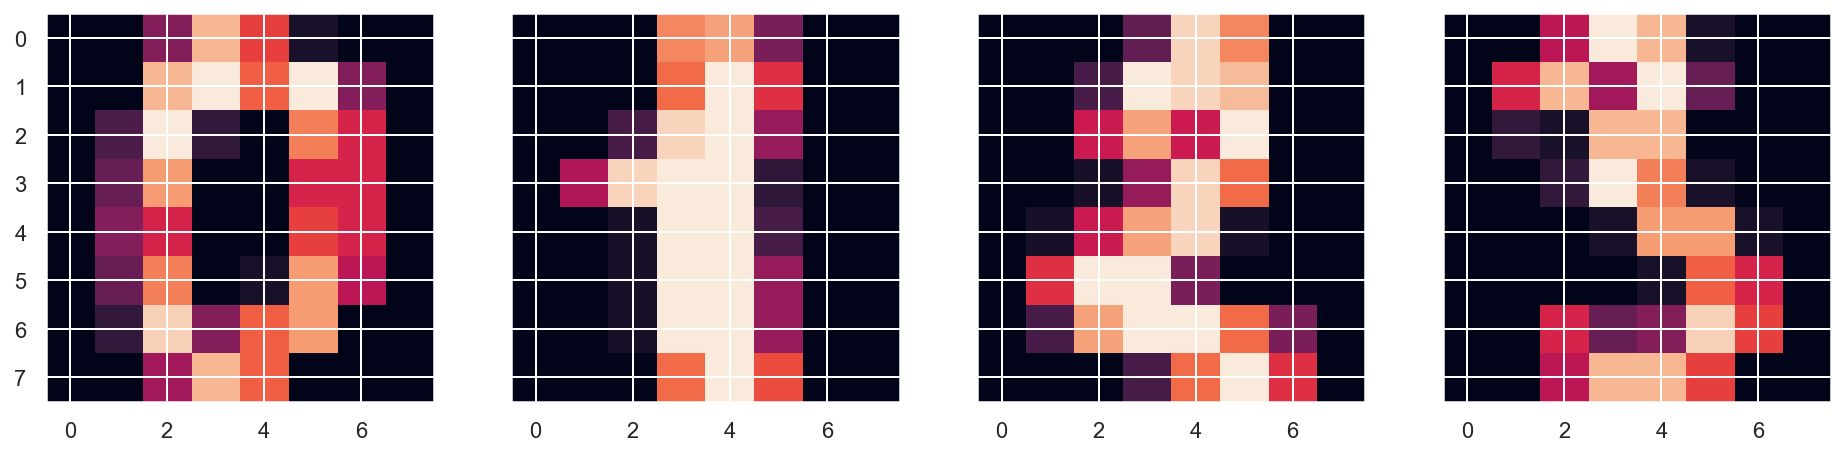

In [262]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [282]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

In [283]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [285]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
print (f"K-Nearest neighbor accuracy is {accuracy_score(y_holdout, knn_pred)}")
print (f"Decision tree accuracy is {accuracy_score(y_holdout, tree_pred)}")

K-Nearest neighbor accuracy is 0.975925925925926
Decision tree accuracy is 0.6666666666666666


In [286]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [278]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 10, 'max_features': 10}, 0.933563702199226)

In [290]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


({'knn__n_neighbors': 1}, 0.9737777777777777)

In [291]:
print (f"Decision tree accuracy is {accuracy_score(y_holdout,  tree_grid.predict(X_holdout))}") 

Decision tree accuracy is 0.8425925925925926


In [294]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) 

0.9864858028204642

`The accuracies of the decision tree [max depth = 5] and K-nearest neighbor [K = 10] are 0.67 and 0.98 respectively. The best hyper-parameter values are 10 for max-depth and 10 for max features. The test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation is 0.99.`

## 3 Problem 3 [10 points]
The files for this problem are under Experiment 3 folder. Datasets to be used for experimentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or spam. In this experiment we will learn about text features, how to convert them in matrix form, and apply the Naive Bayes algorithm. Answer the following questions: 
1. What is the distribution of the "label" class. Is it skewed? 
2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency? 
3. What is the maximum and minimum length of SMS present in the dataset? 
4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?
5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.

1. What is the distribution of the "label" class. Is it skewed? 

In [306]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

In [307]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [311]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0, 0.5, 'Frequency')

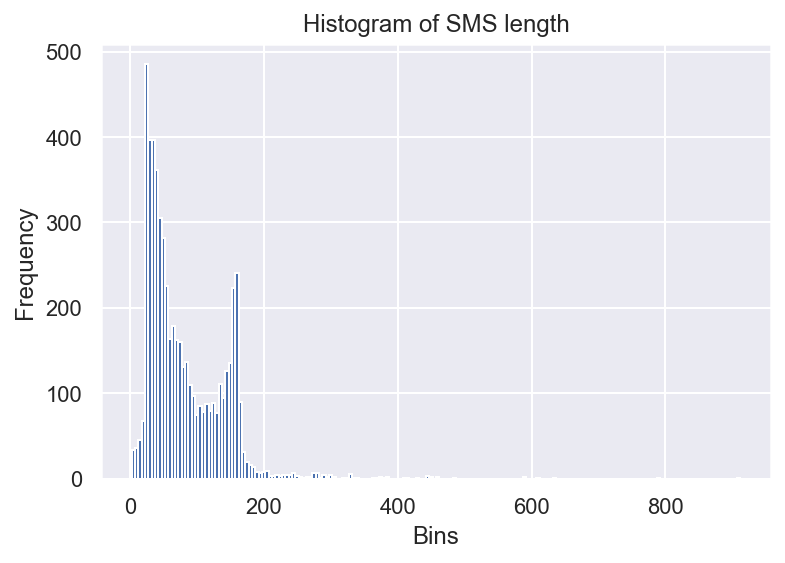

In [312]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 5
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

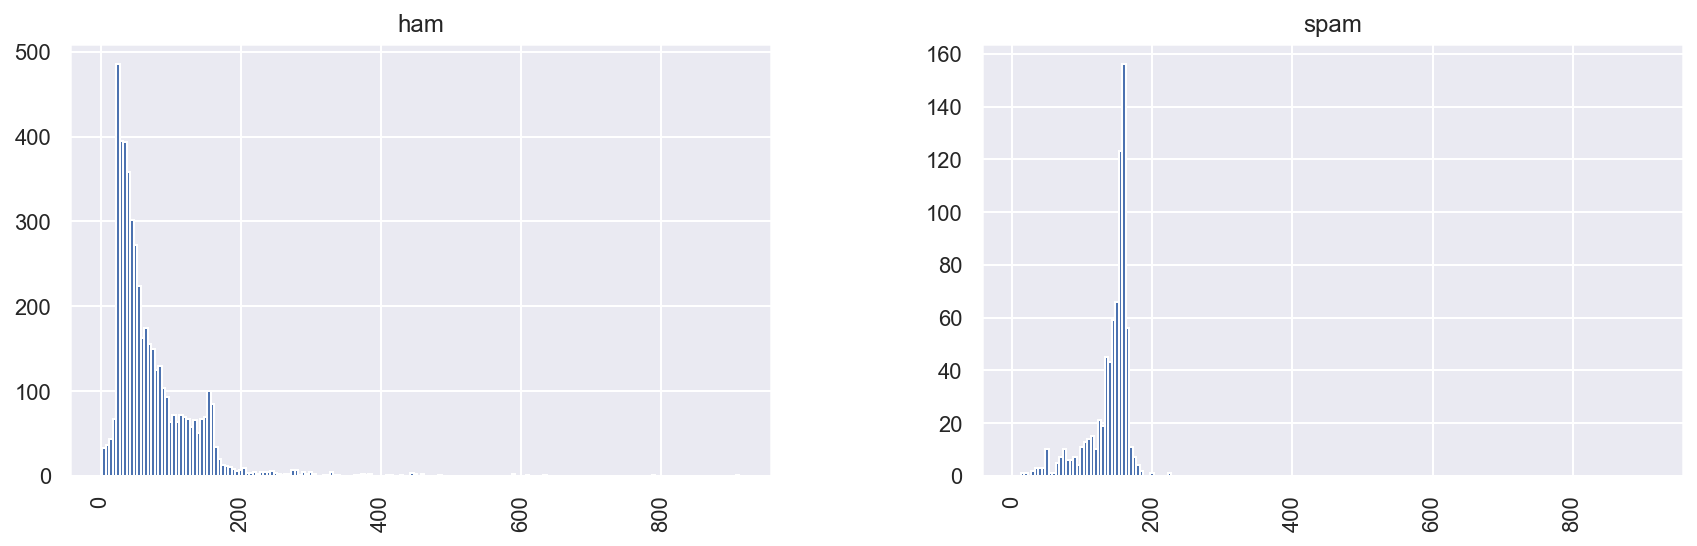

In [313]:
import matplotlib.pyplot as plt

df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

`The label class is right skewed for ham and left skewed for spam`

2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency? 

In [299]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [300]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [301]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [303]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


`There are 5169 unique values of SMS. The SMS that occurred most frequently was "Sorry, I'll call later"`

3. What is the maximum and minimum length of SMS present in the dataset? 

In [123]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [125]:
print (f"Maximum length of SMS is {max(df_sms['length'])}")

Maximum length of SMS is 910


In [314]:
print (f"Minimim length of SMS is {min(df_sms['length'])}")

Minimim length of SMS is 2


`The maximum length of SMS is 910 and the minimum length of SMS is 2`

4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?

Text(0, 0.5, 'Frequency')

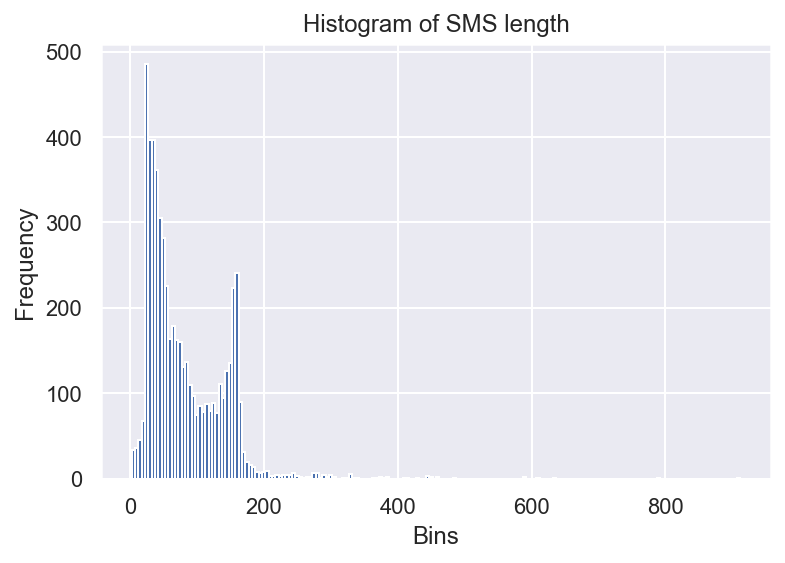

In [315]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 5
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

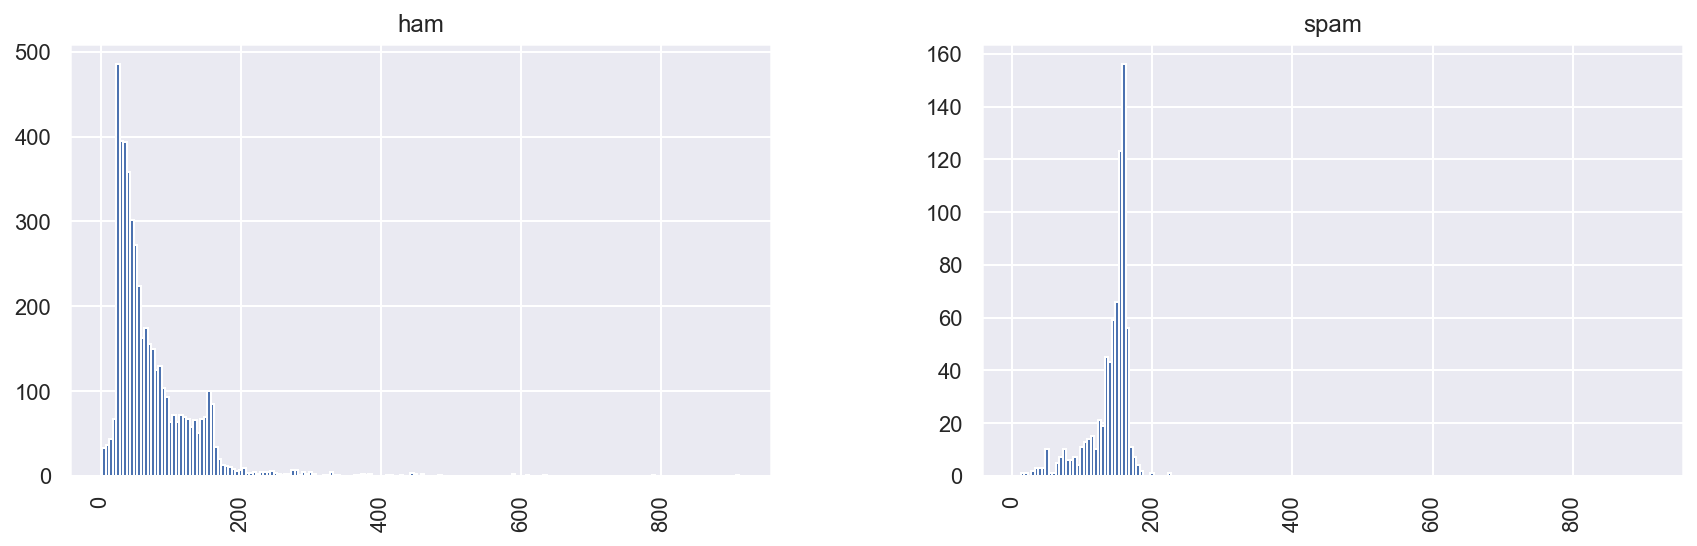

In [132]:
df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.

In [316]:
documents = ['Hi, how are you?', 
             'Win money, win from home. Call now.', 
             'Hi. Call you now or tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hi, how are you?', 'win money, win from home. call now.', 'hi. call you now or tomorrow?']


In [317]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hi how are you',
 'win money win from home call now',
 'hi call you now or tomorrow']

In [138]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hi', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home', 'call', 'now'],
 ['hi', 'call', 'you', 'now', 'or', 'tomorrow']]

In [140]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hi': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1, 'call': 1, 'now': 1}),
 Counter({'hi': 1, 'call': 1, 'you': 1, 'now': 1, 'or': 1, 'tomorrow': 1})]


In [142]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [144]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hi',
 'home',
 'how',
 'money',
 'now',
 'or',
 'tomorrow',
 'win',
 'you']

In [146]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]])

In [148]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hi,home,how,money,now,or,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,1,0,1,1,0,0,2,0
2,0,1,0,1,0,0,0,1,1,1,0,1


In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)


In [152]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [154]:
print (training_data.shape)

(4457, 7777)


In [156]:
print (testing_data.shape)

(1115, 7777)


In [167]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [326]:
#Make prediction on test dataset
predictions = naive_bayes.predict(testing_data)

In [319]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996


ValueError: pos_label=1 is not a valid label. It should be one of ['ham', 'spam']